A biblioteca scikit-learn possui internamente um conjunto de dados composto por 1.797 exemplos de imagens de dígitos 0 à 9

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


In [0]:
digits = load_digits()


Exemplo dos dígitos utilizados no treinamento.

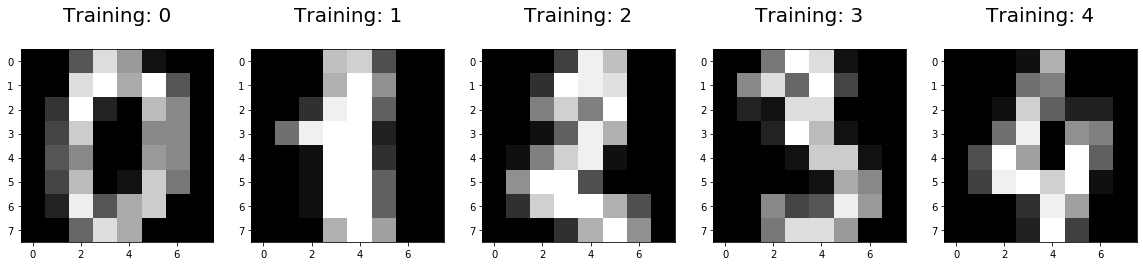

In [30]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()

 Matriz de dimensão 8 x 8 com os valores que correspondem ao exemplo de um dígito zero.

In [31]:
print(np.reshape(digits.data[0], (8, 8)))


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Realizando a convolução


 Exemplo do dígito zero

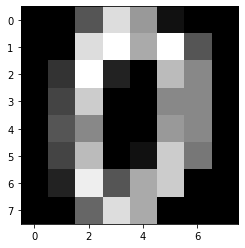

In [32]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:1], digits.target[0:5])):
  plt.subplot(1, 1, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
plt.show()

In [33]:
en = 8 # tamanho da dimensão da entrada
kn = 3 # tamanho da dimensão do kernel
k = 10 # quantidade de kernels
qtdMatrizes = (en - kn) ** 2
kernels = np.random.randn(k, kn, kn)

def partes(x):
    partesDigito = []
    entrada = np.zeros(((en - kn) ** 2, kn, kn))
    X = x.reshape(en, en) # Muda a entrada vetorial para matriz
    for ki in range(0, k): # Para cada kernel separa a entrada em partes
        index = 0;
        for i in range(0, en - kn): 
            for j in range(0, en - kn):
                entrada[index] = X[i:i+kn, j:j+kn] # Cada parte é uma submatriz da entrada
                index += 1
        partesDigito.append((ki, entrada)) # Para cada kernel gera varias partes da entrada
    return partesDigito

partesDigito = partes(digits.data[0])
print(partesDigito[0])

(0, array([[[ 0.,  0.,  5.],
        [ 0.,  0., 13.],
        [ 0.,  3., 15.]],

       [[ 0.,  5., 13.],
        [ 0., 13., 15.],
        [ 3., 15.,  2.]],

       [[ 5., 13.,  9.],
        [13., 15., 10.],
        [15.,  2.,  0.]],

       [[13.,  9.,  1.],
        [15., 10., 15.],
        [ 2.,  0., 11.]],

       [[ 9.,  1.,  0.],
        [10., 15.,  5.],
        [ 0., 11.,  8.]],

       [[ 0.,  0., 13.],
        [ 0.,  3., 15.],
        [ 0.,  4., 12.]],

       [[ 0., 13., 15.],
        [ 3., 15.,  2.],
        [ 4., 12.,  0.]],

       [[13., 15., 10.],
        [15.,  2.,  0.],
        [12.,  0.,  0.]],

       [[15., 10., 15.],
        [ 2.,  0., 11.],
        [ 0.,  0.,  8.]],

       [[10., 15.,  5.],
        [ 0., 11.,  8.],
        [ 0.,  8.,  8.]],

       [[ 0.,  3., 15.],
        [ 0.,  4., 12.],
        [ 0.,  5.,  8.]],

       [[ 3., 15.,  2.],
        [ 4., 12.,  0.],
        [ 5.,  8.,  0.]],

       [[15.,  2.,  0.],
        [12.,  0.,  0.],
        [ 8.,  0.,  0.

Exemplo de partes que podem ser geradas a partir do dígito zero.

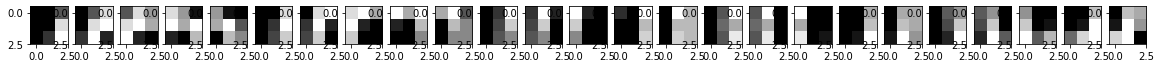

In [34]:
plt.figure(figsize=(20, 4)) 
for index, image in enumerate(partesDigito[0][1]):
  plt.subplot(1, len(partesDigito[0][1]), index + 1)
  plt.imshow(image, cmap=plt.cm.gray)
plt.show()

Após aplicar o kernel em toda área da matriz de entrada, o resultado obtido é um mapa com todas as ativações.

In [35]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

# t representa a dimensão de um mapa de ativação
t = en - kn + 1

# Aplica a função de ativação no resultado da multiplicação do kernel pela entrada
# Recebe como entrada o kernel e uma matriz com as partes da entrada
def ativacao(k, x):
    mapa = np.zeros((t, t)) #Mapa de ativações de um kernel vazio
    for i in range(0, len(x) - 1): #Para cada parte da matriz da entrada
        mapa[int(i/t)][i%t] = sigmoid((x[i] * k).sum())
    return mapa

print("Mapa de ativações de um kernel")
print(ativacao(kernels[0], partesDigito[0][1]))

Mapa de ativações de um kernel
[[4.61003042e-12 9.21452723e-05 9.97411478e-01 4.73605984e-11
  3.70191637e-04 2.40783655e-15]
 [9.99974845e-01 9.99999641e-01 1.65395875e-11 4.72044135e-01
  9.67316663e-12 1.00000000e+00]
 [9.96283036e-01 7.83683996e-12 6.60246367e-02 1.58015343e-09
  1.00000000e+00 9.99782044e-01]
 [2.55073243e-11 2.59804705e-01 1.19386451e-10 9.99999970e-01
  9.99981975e-01 2.57074122e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


Exemplo de mapa de ativações.



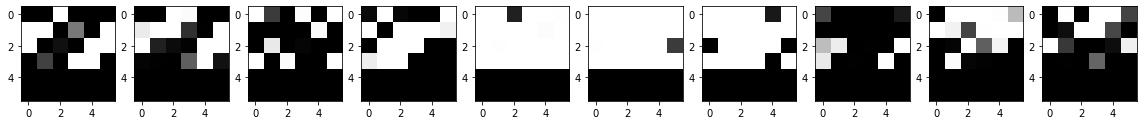

In [36]:
mapas = np.zeros((k, t, t))

for i in range(0, k):
    mapas[i] = ativacao(kernels[partesDigito[i][0]], partesDigito[i][1])

plt.figure(figsize=(20, 4))
for index, image in enumerate(mapas):
  plt.subplot(1, len(mapas), index + 1)
  plt.imshow(image, cmap=plt.cm.gray)
plt.show()

Agrupamento com Max Pooling

Após gerado o mapa de ativações é realizado seu agrupamento, normalmente utilizando a função Max Pooling, que agrupa regiões do mapa de ativações mantendo apenas o maior valor de cada região, assim gerando um mapa de ativações mais compacto e mantendo sua principais ativações.

In [37]:
pn = 2 # tamanho do pooling
ps = 2 # tamanho do passo do pooling

# Max Pooling
def maxPooling(x):
    agrupado = np.zeros((int(t / pn), int(t / pn)))
    for i in range(0, int(t / pn)):
        for j in range(0, int(t / pn)):
            agrupado[i][j] = x[i * pn : i * pn + kn - 1, j * pn : j * pn + kn - 1].max()
    return agrupado

pooling = []
for i in range(0, len(mapas)):
    pooling.append(maxPooling(mapas[i]))
    
print(pooling[0])

[[0.99999964 0.99741148 1.        ]
 [0.99628304 0.99999997 1.        ]
 [0.         0.         0.        ]]


Camada densa com Multilayer Perceptron

A cada camada convolucional serão gerados mais mapas de ativações, a última camada convolucional passará os mapas para uma MLP que gera como saída a probabilidade de cada dígito entre 0 e 9 dada a entrada inicial da CNN.

In [38]:
# weights representa os pesos da camada densa (MLP), aqui ainda falta fazer o backpropagation para ajustar esses pesos.
weights = np.random.randn(10, 90)

# função de ativação RELU
def relu(x):
    return max(0, x)

# Multilayer Perceptron
def mlp(x):
    # A saída é um vetor que será passado para a camada de saída.
    saida = []
    for w in weights:
        saida.append(relu((w * x).sum()))
    return saida

print (mlp(np.asarray(pooling).ravel()))

[0.816519066597905, 0, 0, 1.4646216765316593, 3.534694267576978, 0, 8.60093121088694, 0, 8.321569035128856, 7.292330623934389]


Camada de saída

A camada de saída aplica a função de ativação softmax para gerar uma distribuição de probabilidades entre 0 e 1 nos valores de saída. A saída é um vetor de 10 valores, cada valor representará a probabilidade de que cada um dos números entre zero e nove, tem de representar o número da figura que será classificada.

In [39]:
# weights representa os pesos da camada de saída, aqui ainda falta fazer o backpropagation para ajustar esses pesos.
weightsOut = np.random.randn(10, 1)

# função de ativação SoftMax
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def out(x):
    # A saída representa a probabilidade de cada número entre zero e nove.
    saida = []
    for i in range(0, len(weightsOut)):
        saida.append((weightsOut[i] * x).sum())
    return softmax(saida)

x = mlp(np.asarray(pooling).ravel())
print(out(x))

[1.91151641e-12 1.09859234e-17 1.33006665e-38 6.46688219e-17
 1.96751898e-17 1.00000000e+00 4.04927632e-20 1.80233219e-27
 1.61248113e-12 3.87056220e-40]


**Montando a Rede Neural Convolucional com o MapReduce**

A estrutura da CNN é formada por várias camadas que podem ser representadas por meio do mapeamento feito pelo MapReduce do Spark.

Uma forma de representar uma CNN usando MapReduce seria:

Para cada camada convolucional:

a) Mapeia a entrada para uma matriz com várias partes de tamanho igual ao kernel;

b) Mapeia cada parte da entrada com o kernel, aplicando a função de ativação e gerando um mapa de ativações;

c) Aplica o agrupamento em cada mapa de ativações gerando como saída um mapa de ativações com dimensão reduzida;

d) Junta todos os mapas de ativações, pois serão passados como entrada para a camada seguinte.

A saída da última camada convolucional é passada para uma MLP, que:

a) Mapeia os mapas de ativações para um vetor sequencial;

b) O vetor sequencial é passado para a camada densa que aplica a função de ativação RELU;

c) Os dados são passados para a camada de saída que gera as probabilidades representando cada um dos dígitos.

In [42]:
sc = SparkContext.getOrCreate()
# Montando um RDD com todo dataset de digitos
rdd = sc.parallelize(digits.data, 4)

# Cria uma matriz com os kernels (filtros) da primeira camada convolucional
kernels1 = np.random.randn(k, kn, kn)

print(rdd
      # 1º convolucao
      .map(lambda x: partes(x)) # Separa as 25 partes da imagem para cada um dos 10 kernels
      .map(lambda x: list(map(lambda y: ativacao(kernels1[y[0]], y[1]), x))) # Gera o mapa de ativações de cada kernel
      .map(lambda x: list(map(lambda y: maxPooling(y), x))) # Aplica o max pooling na primeira camada
      # Camada Densa (MLP)
      .map(lambda x: np.asarray(x).ravel()) # Converte a matriz de saída da camada convolucional para um vetor 
      .map(lambda x: mlp(x)) # Manda os dados da última camada convolucional agrupada para a camada Densa
      .map(lambda x: out(x)) # Aplica o softmax e retorna os valores das probabilidades de cada número. 
      .take(1))

NameError: ignored